In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from common import *

%matplotlib inline

bottleneck_features = np.load('data/bottleneck_features/yelp_resnet50.npz')

X_train = bottleneck_features['train_features'].reshape(20000,2048)
X_valid = bottleneck_features['valid_features'].reshape(2000,2048)
X_test  = bottleneck_features['test_features'].reshape(2000,2048)

y_train = bottleneck_features['train_targets']
y_valid = bottleneck_features['valid_targets']
y_test  = bottleneck_features['test_targets']

Using TensorFlow backend.


In [2]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

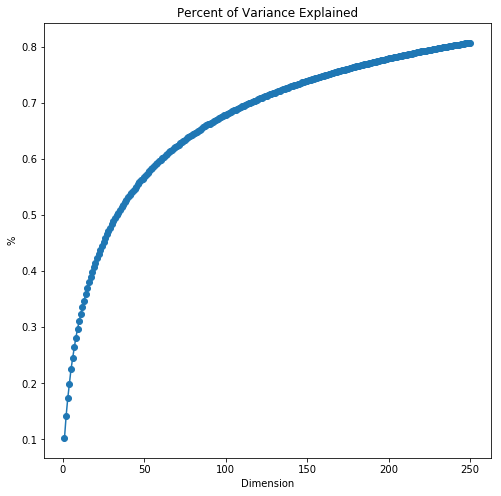

In [3]:
from sklearn.decomposition import PCA
n_comp = 250
pca = PCA(n_components=n_comp, svd_solver='randomized', whiten=True)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)

plt.figure(figsize=(8,8))
plt.plot(np.arange(1, n_comp+1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Dimension')
plt.ylabel('%')
plt.title("Percent of Variance Explained")
plt.show()

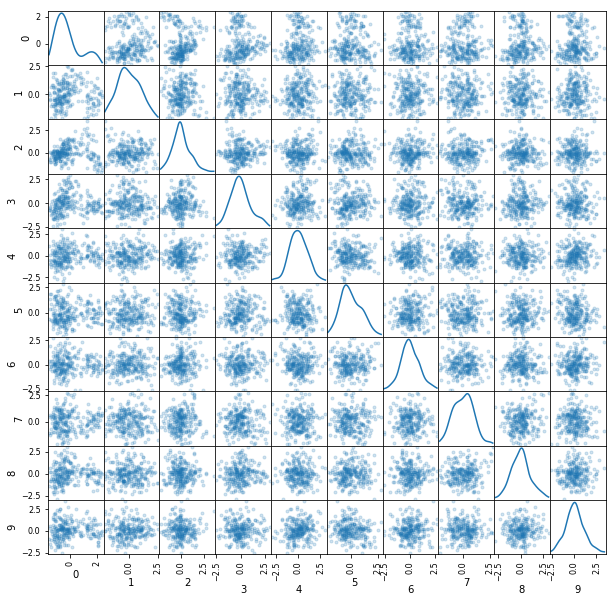

In [4]:
data = pd.DataFrame(X_train_reduced)
data.describe()

from pandas.tools.plotting import scatter_matrix
corr = scatter_matrix(data.iloc[:250,:10], alpha=0.2, figsize=(10, 10), diagonal='kde')

[0]	train-logloss:0.689393	valid-logloss:0.689801
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.589266	valid-logloss:0.606833
[60]	train-logloss:0.516717	valid-logloss:0.554121
[90]	train-logloss:0.463108	valid-logloss:0.518811
[120]	train-logloss:0.42152	valid-logloss:0.495567
[150]	train-logloss:0.387442	valid-logloss:0.479681
[180]	train-logloss:0.358066	valid-logloss:0.467866
[210]	train-logloss:0.331726	valid-logloss:0.458963
[240]	train-logloss:0.309199	valid-logloss:0.451492
[270]	train-logloss:0.289434	valid-logloss:0.446332
[300]	train-logloss:0.271497	valid-logloss:0.442039
[330]	train-logloss:0.255023	valid-logloss:0.438185
[360]	train-logloss:0.240664	valid-logloss:0.435405
[390]	train-logloss:0.227481	valid-logloss:0.433212
[420]	train-logloss:0.215334	valid-logloss:0.430995
[450]	train-logloss:0.203941	valid-logloss:0.430046
[480]	train-logloss:0.1

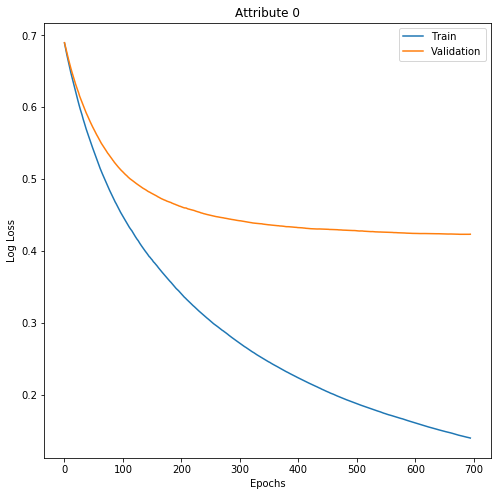

[0]	train-logloss:0.691302	valid-logloss:0.692409
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.626251	valid-logloss:0.660036
[60]	train-logloss:0.568596	valid-logloss:0.632574
[90]	train-logloss:0.521854	valid-logloss:0.612726
[120]	train-logloss:0.482818	valid-logloss:0.597826
[150]	train-logloss:0.448492	valid-logloss:0.585674
[180]	train-logloss:0.417733	valid-logloss:0.575303
[210]	train-logloss:0.390685	valid-logloss:0.567208
[240]	train-logloss:0.366119	valid-logloss:0.560208
[270]	train-logloss:0.344994	valid-logloss:0.554435
[300]	train-logloss:0.325527	valid-logloss:0.549103
[330]	train-logloss:0.307221	valid-logloss:0.544032
[360]	train-logloss:0.290211	valid-logloss:0.539998
[390]	train-logloss:0.274808	valid-logloss:0.536821
[420]	train-logloss:0.261091	valid-logloss:0.53347
[450]	train-logloss:0.24866	valid-logloss:0.53103
[480]	train-logloss:0.236

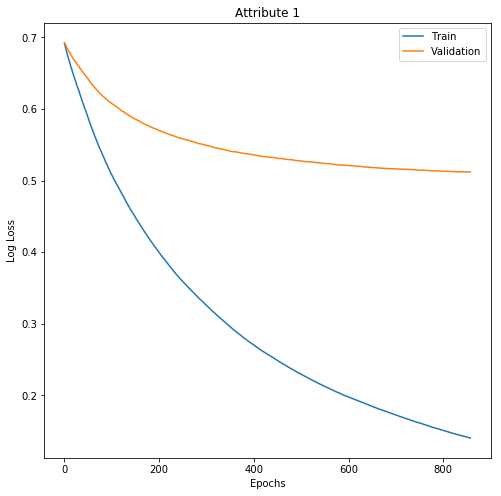

[0]	train-logloss:0.690796	valid-logloss:0.691703
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.617049	valid-logloss:0.647748
[60]	train-logloss:0.553074	valid-logloss:0.61285
[90]	train-logloss:0.502976	valid-logloss:0.588454
[120]	train-logloss:0.462137	valid-logloss:0.57043
[150]	train-logloss:0.425653	valid-logloss:0.555149
[180]	train-logloss:0.395877	valid-logloss:0.543378
[210]	train-logloss:0.368074	valid-logloss:0.533598
[240]	train-logloss:0.343872	valid-logloss:0.525702
[270]	train-logloss:0.323243	valid-logloss:0.519905
[300]	train-logloss:0.303626	valid-logloss:0.514249
[330]	train-logloss:0.285363	valid-logloss:0.509205
[360]	train-logloss:0.268904	valid-logloss:0.504987
[390]	train-logloss:0.25439	valid-logloss:0.501831
[420]	train-logloss:0.240851	valid-logloss:0.498546
[450]	train-logloss:0.228915	valid-logloss:0.49567
[480]	train-logloss:0.2178

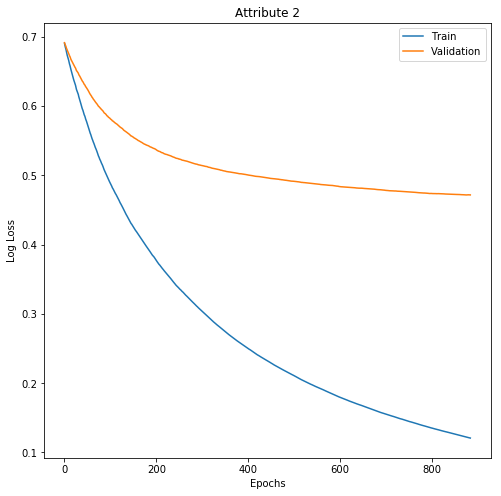

[0]	train-logloss:0.691562	valid-logloss:0.693025
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.655389	valid-logloss:0.689199
[60]	train-logloss:0.62272	valid-logloss:0.684871
[90]	train-logloss:0.593534	valid-logloss:0.682563
[120]	train-logloss:0.565264	valid-logloss:0.679746
[150]	train-logloss:0.540456	valid-logloss:0.677394
[180]	train-logloss:0.517874	valid-logloss:0.675582
[210]	train-logloss:0.495018	valid-logloss:0.674307
[240]	train-logloss:0.474495	valid-logloss:0.673505
Stopping. Best iteration:
[246]	train-logloss:0.470383	valid-logloss:0.672966



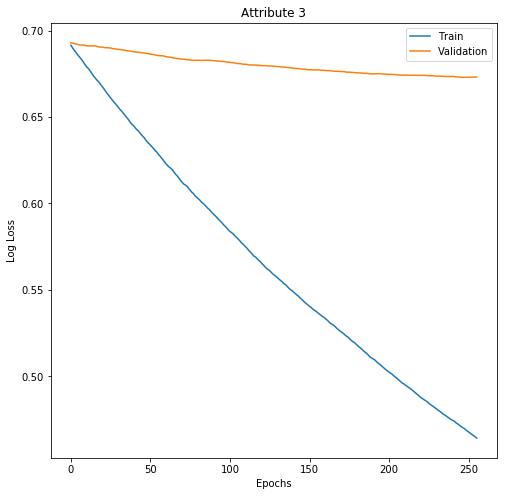

[0]	train-logloss:0.691342	valid-logloss:0.692988
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.626879	valid-logloss:0.664956
[60]	train-logloss:0.570568	valid-logloss:0.639757
[90]	train-logloss:0.523317	valid-logloss:0.621759
[120]	train-logloss:0.484206	valid-logloss:0.609124
[150]	train-logloss:0.449262	valid-logloss:0.597177
[180]	train-logloss:0.419495	valid-logloss:0.588231
[210]	train-logloss:0.39214	valid-logloss:0.580266
[240]	train-logloss:0.367495	valid-logloss:0.572998
[270]	train-logloss:0.347085	valid-logloss:0.568083
[300]	train-logloss:0.327055	valid-logloss:0.562816
[330]	train-logloss:0.308582	valid-logloss:0.558024
[360]	train-logloss:0.292383	valid-logloss:0.554459
[390]	train-logloss:0.277703	valid-logloss:0.552027
[420]	train-logloss:0.263541	valid-logloss:0.549606
[450]	train-logloss:0.250848	valid-logloss:0.547223
[480]	train-logloss:0.2

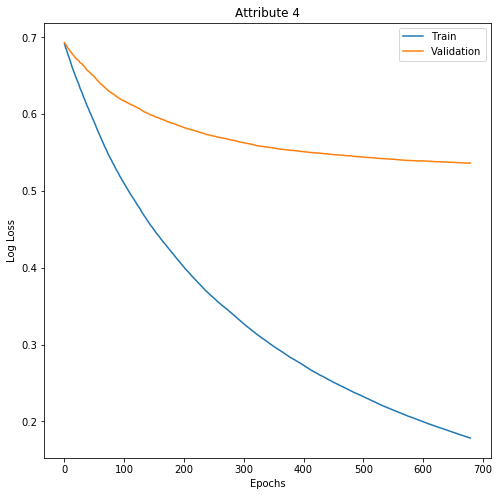

[0]	train-logloss:0.689828	valid-logloss:0.690359
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.59666	valid-logloss:0.619481
[60]	train-logloss:0.526423	valid-logloss:0.570851
[90]	train-logloss:0.472646	valid-logloss:0.537465
[120]	train-logloss:0.430552	valid-logloss:0.513558
[150]	train-logloss:0.394175	valid-logloss:0.496388
[180]	train-logloss:0.363978	valid-logloss:0.483184
[210]	train-logloss:0.337478	valid-logloss:0.472547
[240]	train-logloss:0.313585	valid-logloss:0.464038
[270]	train-logloss:0.293474	valid-logloss:0.457444
[300]	train-logloss:0.274966	valid-logloss:0.451944
[330]	train-logloss:0.257288	valid-logloss:0.446588
[360]	train-logloss:0.242053	valid-logloss:0.441896
[390]	train-logloss:0.228645	valid-logloss:0.438275
[420]	train-logloss:0.216473	valid-logloss:0.435072
[450]	train-logloss:0.205159	valid-logloss:0.43248
[480]	train-logloss:0.19

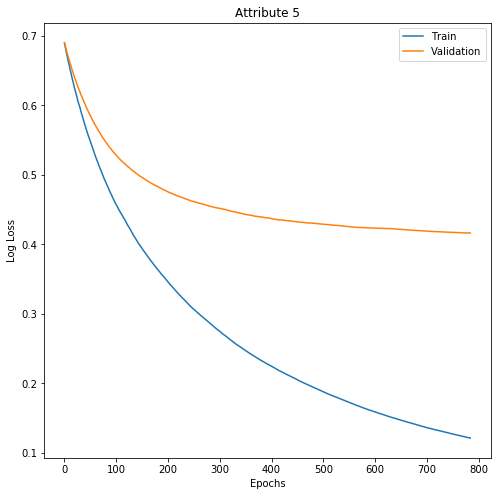

[0]	train-logloss:0.689237	valid-logloss:0.68971
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.581272	valid-logloss:0.600912
[60]	train-logloss:0.501764	valid-logloss:0.541966
[90]	train-logloss:0.443616	valid-logloss:0.503551
[120]	train-logloss:0.399712	valid-logloss:0.477289
[150]	train-logloss:0.362653	valid-logloss:0.456851
[180]	train-logloss:0.331987	valid-logloss:0.442291
[210]	train-logloss:0.304464	valid-logloss:0.430407
[240]	train-logloss:0.281696	valid-logloss:0.420994
[270]	train-logloss:0.261875	valid-logloss:0.414835
[300]	train-logloss:0.243924	valid-logloss:0.409449
[330]	train-logloss:0.227547	valid-logloss:0.403989
[360]	train-logloss:0.2126	valid-logloss:0.400173
[390]	train-logloss:0.199625	valid-logloss:0.397084
[420]	train-logloss:0.187526	valid-logloss:0.394507
[450]	train-logloss:0.176801	valid-logloss:0.391904
[480]	train-logloss:0.166

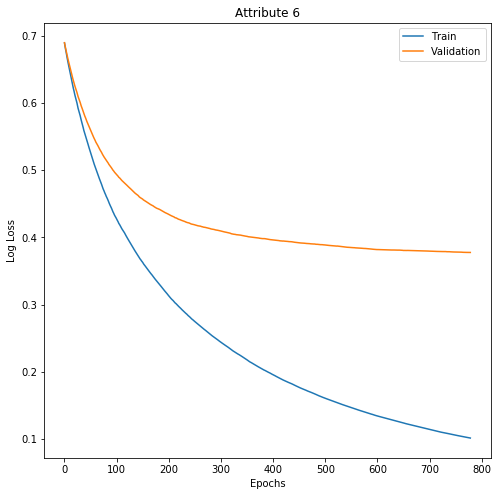

[0]	train-logloss:0.691147	valid-logloss:0.692366
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.624161	valid-logloss:0.659461
[60]	train-logloss:0.566257	valid-logloss:0.631821
[90]	train-logloss:0.521554	valid-logloss:0.612463
[120]	train-logloss:0.4836	valid-logloss:0.598773
[150]	train-logloss:0.449231	valid-logloss:0.587034
[180]	train-logloss:0.419769	valid-logloss:0.577991
[210]	train-logloss:0.392909	valid-logloss:0.570709
[240]	train-logloss:0.370061	valid-logloss:0.564748
[270]	train-logloss:0.349933	valid-logloss:0.559781
[300]	train-logloss:0.330564	valid-logloss:0.555446
[330]	train-logloss:0.312569	valid-logloss:0.551649
[360]	train-logloss:0.296622	valid-logloss:0.548944
[390]	train-logloss:0.281928	valid-logloss:0.546626
[420]	train-logloss:0.269163	valid-logloss:0.54423
[450]	train-logloss:0.256365	valid-logloss:0.541994
[480]	train-logloss:0.244

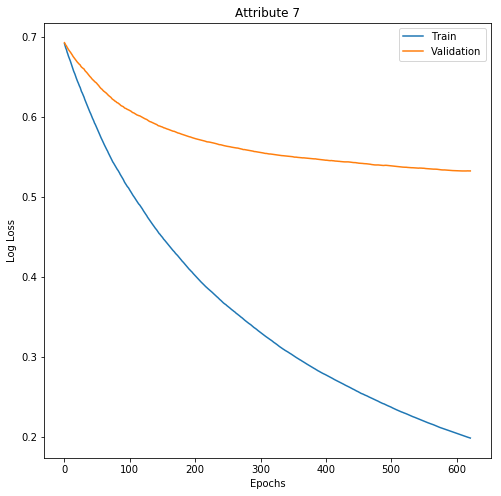

[0]	train-logloss:0.691567	valid-logloss:0.692945
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 10 rounds.
[30]	train-logloss:0.63199	valid-logloss:0.670176
[60]	train-logloss:0.576381	valid-logloss:0.647622
[90]	train-logloss:0.531057	valid-logloss:0.630874
[120]	train-logloss:0.492528	valid-logloss:0.618248
[150]	train-logloss:0.457723	valid-logloss:0.607457
[180]	train-logloss:0.428172	valid-logloss:0.597671
[210]	train-logloss:0.400312	valid-logloss:0.589814
[240]	train-logloss:0.375838	valid-logloss:0.583555
[270]	train-logloss:0.354526	valid-logloss:0.578732
[300]	train-logloss:0.334355	valid-logloss:0.574302
[330]	train-logloss:0.316088	valid-logloss:0.570344
[360]	train-logloss:0.299781	valid-logloss:0.566934
[390]	train-logloss:0.284804	valid-logloss:0.564569
[420]	train-logloss:0.270441	valid-logloss:0.561953
[450]	train-logloss:0.257666	valid-logloss:0.559868
[480]	train-logloss:0.2

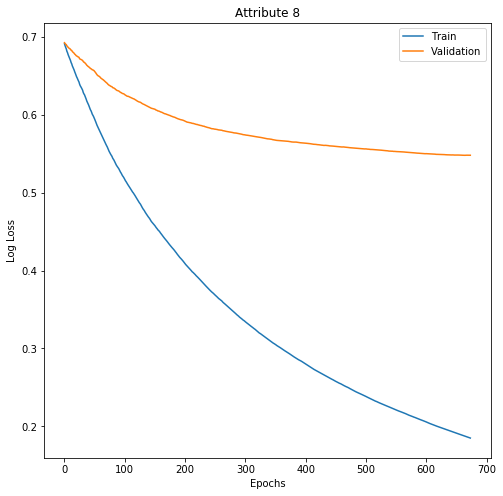

In [5]:
import xgboost as xgb

param = {}
param['objective'] = 'binary:logistic'
param['eta'] = 0.01
param['max_depth'] = 10
param['subsample'] = 0.5
param['eval_metric'] = 'logloss'
param['colsample_bytree'] = 0.3
param['nthread'] = 4

num_round = 1000

y_valid_hat = np.zeros(y_valid.shape, dtype=np.int32)
y_test_hat = np.zeros(y_test.shape, dtype=np.int32)

for i in range(9):
    xg_train = xgb.DMatrix(X_train_reduced, label=y_train[:,i])
    xg_valid = xgb.DMatrix(X_valid_reduced, label=y_valid[:,i])
    xg_test = xgb.DMatrix(X_test_reduced, label=y_test[:,i])

    eval_list = [(xg_train, 'train'),(xg_valid, 'valid')]
    results = {}
    model = xgb.train(param, xg_train, num_round, eval_list, verbose_eval=30, 
                      early_stopping_rounds=10, evals_result=results)

    predictions = (model.predict(xg_valid) >= 0.5).astype(int)
    y_valid_hat[:,i] = predictions
    y_test_hat[:,i] = (model.predict(xg_test) >= 0.5).astype(int)
    
    epochs = len(results['train']['logloss'])
    x_axis = range(0, epochs)
    
    plt.figure(figsize=(8,8))
    plt.ylabel('Log Loss')
    plt.xlabel('Epochs')
    plt.title('Attribute %d' %i)
    plt.plot(x_axis, results['train']['logloss'], label='Train')
    plt.plot(x_axis, results['valid']['logloss'], label='Validation')
    plt.legend()
    plt.show()

In [6]:
print("Test dataset \n F1 score = %.5f \n" % f1_score(y_test, y_test_hat))
print("Validation dataset \n F1 score = %.5f" % f1_score(y_valid, y_valid_hat))

Test dataset 
 F1 score = 0.75361 

Validation dataset 
 F1 score = 0.76281
